In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./120 Years of Olympic History/athlete_events.csv')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
data['Medal'].fillna("No Medal", inplace=True)

In [7]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

<Axes: xlabel='Weight', ylabel='Count'>

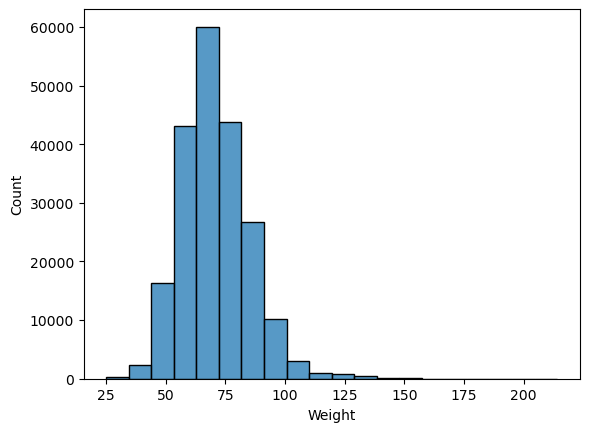

In [8]:
sns.histplot(data, x='Weight', bins=20)

In [9]:
for el in ['Age', 'Height', 'Weight']:
    print(f"Skewness for {el} = {data[el].skew()}")
    skewness = data[el].skew()
    if skewness <= 0.5 and skewness >= -0.5:
        data[el].fillna(data[el].mean(), inplace=True)
    else:
        data[el].fillna(data[el].median(), inplace=True)

Skewness for Age = 1.747122537787137
Skewness for Height = 0.018477298234269277
Skewness for Weight = 0.7971690270264296


In [10]:
data.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


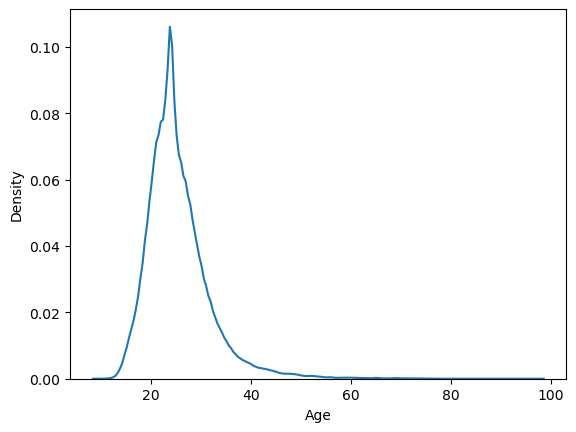

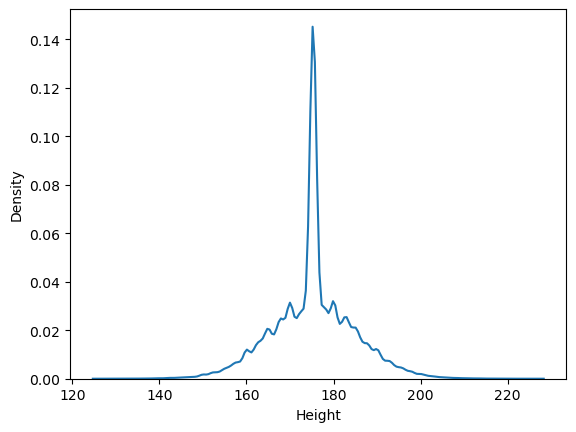

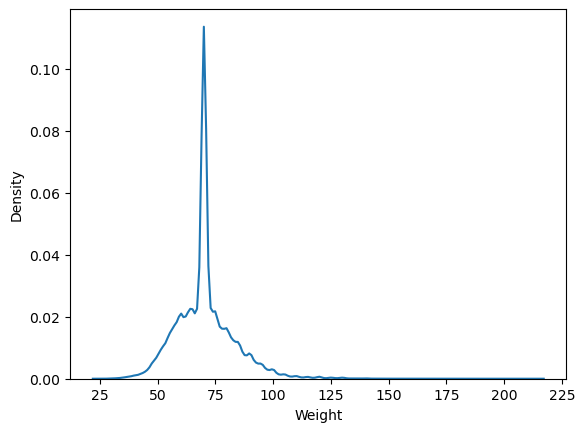

In [12]:
for el in ['Age', 'Height', 'Weight']:
    sns.kdeplot(data[el])
    plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [14]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.502493,175.33897,70.539500,1978.378480
std,39022.286345,6.287361,9.27810,12.578184,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,24.000000,175.33897,70.000000,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


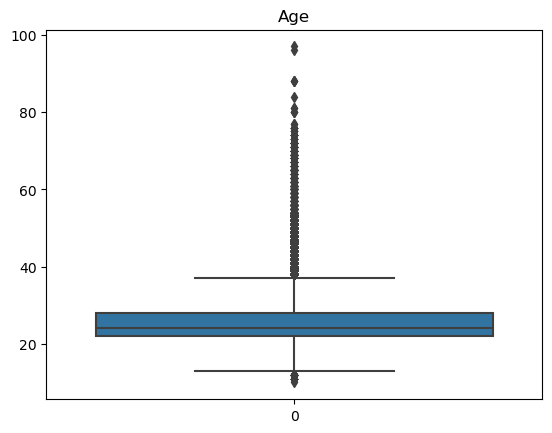

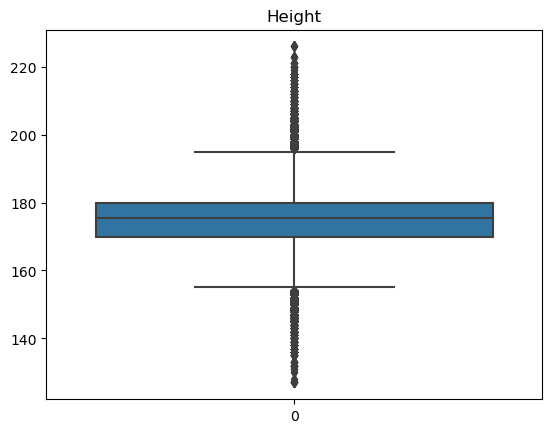

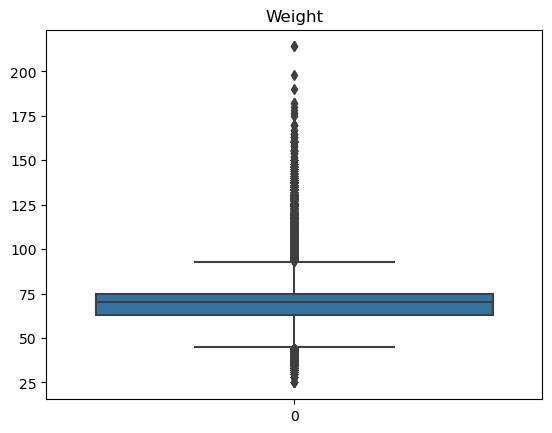

In [15]:
for el in ['Age', 'Height', 'Weight']:
    sns.boxplot(data[el])
    plt.title(el)
    plt.show()

In [16]:
for el in ['Age', 'Height', 'Weight']:
    q1 = data[el].quantile(0.25)
    q3 = data[el].quantile(0.75)
    
    iqr = q3 - q1
    
    upr = q3 + (1.5*iqr)
    lwr = q1 - (1.5*iqr)
    
    print(lwr, upr)    
    
    data[el] = data[el].clip(lwr, upr)

13.0 37.0
155.0 195.0
45.0 93.0


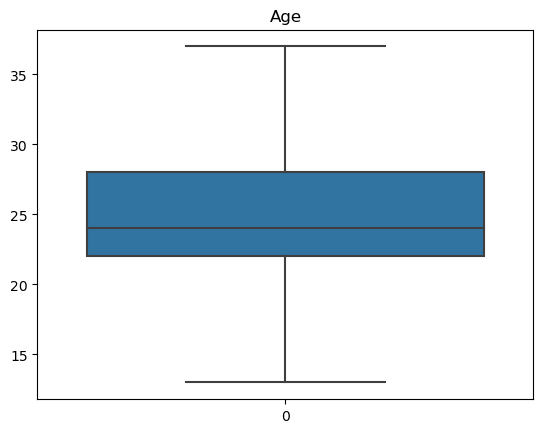

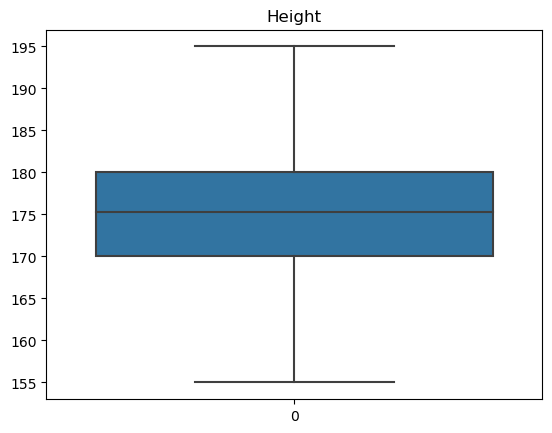

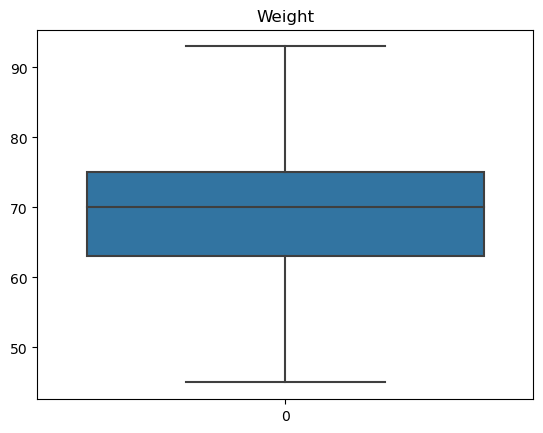

In [17]:
for el in ['Age', 'Height', 'Weight']:
    sns.boxplot(data[el])
    plt.title(el)
    plt.show()

In [18]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.165520,175.318425,70.082891,1978.378480
std,39022.286345,5.178137,8.744743,10.952389,29.877632
min,1.000000,13.000000,155.000000,45.000000,1896.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000
50%,68205.000000,24.000000,175.338970,70.000000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,37.000000,195.000000,93.000000,2016.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [24]:
numberOfParticipants = len(data['Name'].unique())

In [27]:
data.to_csv('./CLeaned Datasets/120YearsofOlympicHistory_cleaned.csv', header=True, index=False)